In [152]:
import pandas as pd
import os
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

#Perform shaprio wilk test for normality on returns data and then use t-test for significance
from scipy.stats import shapiro
from scipy.stats import ttest_ind

Define the date range for the data you want to retrieve

In [214]:
table_name = 'banking_stock_prices'
db_name = 'investment_database.db'

start_date = "2013-01-01"
end_date = "2023-01-01"


Load in the data

In [215]:

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
db_file = os.path.join(parent_dir, 'database', db_name)


# Create a connection to the database
conn = sqlite3.connect(db_file)


# Define the SQL query to retrieve the data within the date range
sql_query = f"SELECT * FROM '{table_name}' WHERE date BETWEEN '{start_date}' AND '{end_date}'"

# Load the data into a pandas DataFrame
df_stocks = pd.read_sql_query(sql_query, conn, parse_dates=['date'])

#get the symbols
symbols = df_stocks['symbol'].unique()
print("symbols = ", symbols)
# Close the connection to the database
conn.close()

symbols =  ['JPM' 'BAC' 'WFC' 'C' 'GS' 'MS' 'USB' 'PNC' 'COF' 'AXP' 'DFS' 'FITB'
 'KEY' 'RF']


In [234]:
df_stocks.head()

,symbol,date,open,high,low,close,volume
0,JPM,2013-01-02,44.980000,45.000000,44.220001,44.660000,31413000
1,JPM,2013-01-03,44.740002,44.750000,44.200001,44.570000,24227700
2,JPM,2013-01-04,44.450001,45.430000,44.439999,45.360001,24487700
3,JPM,2013-01-07,45.090000,45.490002,45.020000,45.410000,24456900
4,JPM,2013-01-08,45.400002,45.500000,44.959999,45.500000,19624200


Compute the daily returns

In [217]:
# Pivot the dataframe to have dates as the index and symbols as the columns
df_pivot = df_stocks.pivot(index='date', columns='symbol', values='close')

# Compute daily returns for each symbol
returns = df_pivot.pct_change()

# drop the first row of the DataFrame
returns = returns.drop(returns.index[0])

# Preview the data
print(returns.head())


symbol           AXP       BAC         C       COF       DFS      FITB  \
date                                                                     
2013-01-03  0.004255 -0.005819  0.003394 -0.011106 -0.003289 -0.008878   
2013-01-04  0.010339  0.012542  0.025127  0.023287  0.016244  0.003839   
2013-01-07  0.004194 -0.001651  0.000943  0.014848 -0.015485 -0.007011   
2013-01-08  0.005680 -0.009098 -0.000236 -0.011450  0.016996 -0.008986   
2013-01-09  0.000997 -0.045910 -0.009892  0.002413 -0.005987 -0.001943   

symbol            GS       JPM       KEY        MS       PNC        RF  \
date                                                                     
2013-01-03 -0.005469 -0.002015  0.006834 -0.002039  0.003527  0.002736   
2013-01-04  0.027264  0.017725  0.012443  0.031154  0.012218  0.035471   
2013-01-07 -0.001859  0.001102  0.002235 -0.019317  0.009094 -0.017128   
2013-01-08 -0.009012  0.001982 -0.001115 -0.007576 -0.012781 -0.008043   
2013-01-09  0.009545 -0.000659 -0.006

# Basic Statistical Analysis

Compute the average volume

In [218]:
# compute the average volume for each symbol
volume = df_stocks.groupby('symbol')['volume'].mean()
print(volume)


symbol
AXP     4.334032e+06
BAC     7.619322e+07
C       2.040338e+07
COF     3.038517e+06
DFS     2.742447e+06
FITB    6.731443e+06
GS      3.121204e+06
JPM     1.565919e+07
KEY     1.085607e+07
MS      1.148933e+07
PNC     2.290396e+06
RF      1.332443e+07
USB     7.169969e+06
WFC     2.276076e+07
Name: volume, dtype: float64


Compute the volatility of the returns

In [219]:
volatility = returns.std()
print("volatility = ", volatility.sort_values(ascending=False))

volatility =  symbol
DFS     0.022785
KEY     0.022114
RF      0.021875
COF     0.021588
FITB    0.021521
C       0.020278
MS      0.019647
BAC     0.019371
AXP     0.018810
WFC     0.018614
GS      0.017624
PNC     0.017460
JPM     0.016914
USB     0.016640
dtype: float64


Create a scatter plot comparing volatility and volume

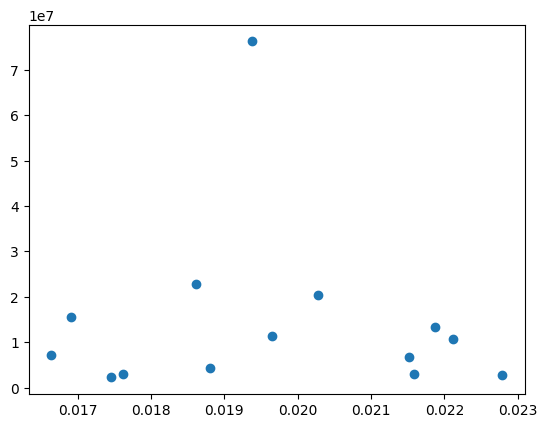

In [220]:
#scatter plot comparing volatility and volume
plt.scatter(volatility, volume)

Correlation matrix of the return

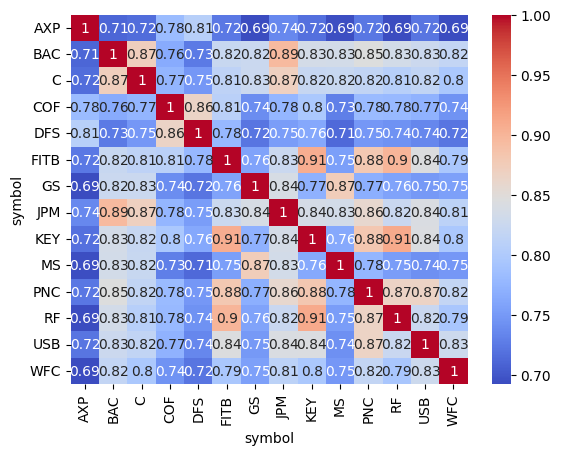

In [221]:
# Compute the correlation matrix
corr_matrix = returns.corr()

# Visualize the correlation matrix as a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

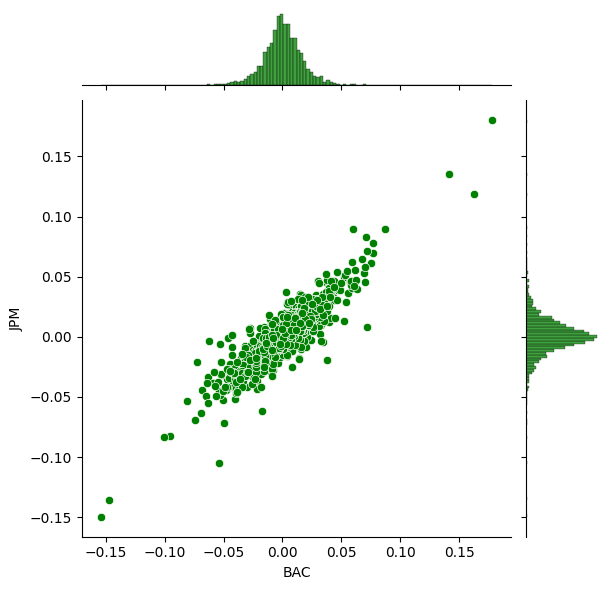

In [222]:
stock_symbol_A  = 'BAC'
stock_symbol_B  = 'JPM'

# create a seaborn jointplot of PXD and COP
sns.jointplot(x=stock_symbol_A, y=stock_symbol_B, data=returns, kind='scatter', color='green')

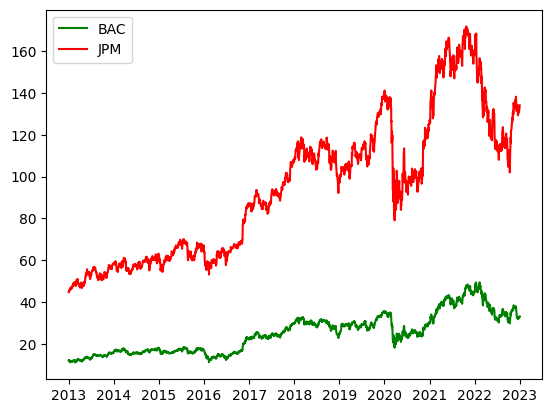

In [236]:
stock_symbol_A  = 'BAC'
stock_symbol_B  = 'JPM'


# plot the PXD and EOG daily closing prices
df_A = df_stocks[df_stocks['symbol'] == stock_symbol_A]
df_B = df_stocks[df_stocks['symbol'] == stock_symbol_B]
# plot the PXD and EOG daily closing prices
plt.plot(df_A['date'], df_A['close'], color='green')
plt.plot(df_B['date'], df_B['close'], color='red')
plt.legend([stock_symbol_A, stock_symbol_B])


Statistical Tests

C:\Users\dmike\AppData\Local\Temp\ipykernel_3912\3597526169.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns[stock_symbol], color='green', bins=100, hist_kws={'alpha': 0.4})


<AxesSubplot: xlabel='BAC', ylabel='Density'>

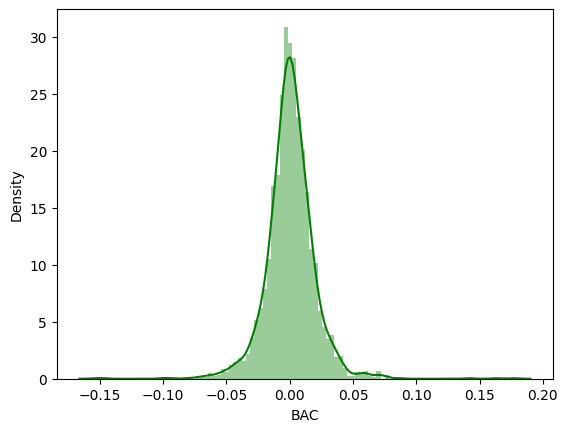

In [237]:
stock_symbol = 'BAC'

#seaborn histogram of PXD daily returns
sns.distplot(returns[stock_symbol], color='green', bins=100, hist_kws={'alpha': 0.4})

In [238]:
stock_symbol = 'BAC'

# Perform the Shapiro-Wilk test
stat, p = shapiro(returns[stock_symbol])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Perform the t-test for non-zero mean of PXD returns
stat, p = ttest_ind(returns[stock_symbol], [0]*len(returns[stock_symbol]))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Zero mean (fail to reject H0)')
else:
    print('Non-zero mean (reject H0)')


Statistics=0.917, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=1.527, p=0.127
Zero mean (fail to reject H0)


Check for independence of the returns

Correlation =  -0.05786852711841224


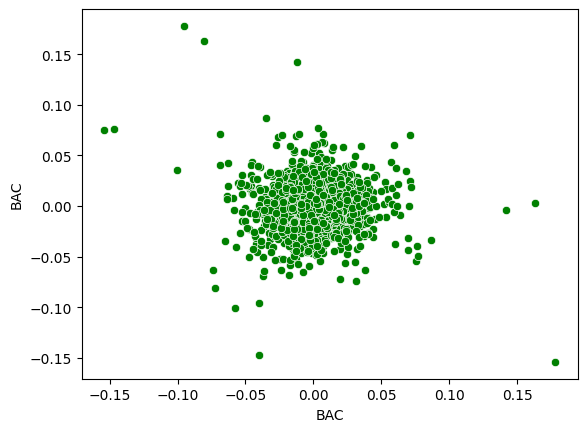

In [239]:
stock_symbol  = 'BAC'

X = returns[stock_symbol].shift(1)
Y= returns[stock_symbol]

#plot seaborn scatterplot of PXD returns vs. PXD returns lagged by 1 day
sns.scatterplot(x=X, y=Y, color='green')

#plot correlation between PXD returns and PXD returns lagged by 1 day
corr = returns[stock_symbol].autocorr()
print("Correlation = ", corr)

In the following cell we perform the Ljung-Box test. This is a statistical test used to determine whether a set of autocorrelations in a time series is different from zero. In the context of financial time series analysis, the Ljung-Box test can be used to test whether the residuals of a time series model are serially correlated or not. The test calculates the Ljung-Box Q statistic, which measures the sum of the squares of the autocorrelations of the residuals up to a given lag, and compares it to a chi-squared distribution. If the p-value associated with the test statistic is less than the significance level, then the null hypothesis of no autocorrelation is rejected, indicating that the residuals are serially correlated. On the other hand, if the p-value is greater than the significance level, then the null hypothesis cannot be rejected, indicating that the residuals are not serially correlated.

In [240]:
import statsmodels.api as sm

# set the maximum number of lags to consider
max_lag = 10


# specify the stock symbol to use
stock_symbol = 'BAC'

# get the returns for the specified stock symbol
stock_returns = returns[stock_symbol]

# compute the autocorrelation of the returns with a 1-lag
autocorr_values = stock_returns.autocorr(lag=1)

# Compute the Ljung-Box Q statistic and its associated p-value
df_ljungbox = sm.stats.acorr_ljungbox(stock_returns, lags=[i for i in range(max_lag)], return_df=True)

print(df_ljungbox.head(max_lag))



     lb_stat     lb_pvalue
0  86.217319           NaN
1   8.438515  3.673562e-03
2  14.741189  6.294937e-04
3  14.897027  1.906795e-03
4  25.050694  4.914275e-05
5  25.796694  9.771287e-05
6  32.213640  1.484865e-05
7  72.518323  4.570292e-13
8  79.810496  5.337618e-14
9  86.217319  9.318244e-15


Next we will perform the augmented Dickey-Fuller (ADF) test, which is a commonly used statistical test to check for stationarity in time series data. The null hypothesis of the ADF test is that the time series is non-stationary, meaning that it has a unit root. The alternative hypothesis is that the time series is stationary. The test statistic is a negative number and the more negative it is, the stronger the evidence against the null hypothesis of non-stationarity. The p-value is the probability of observing a test statistic as extreme or more extreme than the one computed from the data under the null hypothesis. If the p-value is smaller than a pre-specified significance level, typically 0.05, we reject the null hypothesis and conclude that the time series is stationary. The critical values are the threshold values for the test statistic at different significance levels, and they are used to determine if the test statistic is statistically significant.

In [213]:
import statsmodels.api as sm

# specify the stock symbol to use
stock_symbol = 'BAC'

# get the returns for the specified stock symbol
stock_returns = returns[stock_symbol]

# perform the ADF test for stationarity
adf_test = sm.tsa.stattools.adfuller(stock_returns)

# print the results of the ADF test
print(f"ADF test statistic: {adf_test[0]:.2f}")
print(f"p-value: {adf_test[1]:.2f}")
print("Critical values:")
for key, value in adf_test[4].items():
    print(f"\t{key}: {value:.2f}")


ADF test statistic: -13.74
p-value: 0.00
Critical values:
	1%: -3.43
	5%: -2.86
	10%: -2.57
